In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('../input/[2021-2022]청주일일날씨.csv')
stock = pd.read_csv('../input/[2021-2022]인바이오 주가.csv')

df = pd.merge(left=weather, right=stock, on='날짜')

In [3]:
df = df.fillna(method='ffill')
df.drop(columns=['평균운량', '일강수량', '거래량', '변동 %'], inplace=True)

df['날짜'] = df['날짜'].astype(str)
dates = df['날짜'].str.split("- ")

df['연'] = dates.str.get(0).map(int)
df['월'] = dates.str.get(1).map(int)
df['일'] = dates.str.get(2).map(int)

In [4]:
df['고가'] = df['고가'].str.replace(',', '')
df['저가'] = df['저가'].str.replace(',', '')
df['오픈'] = df['오픈'].str.replace(',', '')
df['종가'] = df['종가'].str.replace(',', '')

df['고가'] = df['고가'].map(int)
df['저가'] = df['저가'].map(int)
df['오픈'] = df['오픈'].map(int)
df['종가'] = df['종가'].map(int)

In [5]:
df_group = df.groupby(by='월')

for month, value in df_group:
    if month == 3: break
    print("month: ", month)
    print(value.head())
    print()

month:  1
             날짜  평균기온  최고기온  최저기온     종가     오픈     고가     저가     연  월  일
0  2021- 01- 04  -2.8   1.9  -8.9  16200  15750  16700  14800  2021  1  4
1  2021- 01- 05  -3.4  -0.3  -7.5  16550  16150  18750  15800  2021  1  5
2  2021- 01- 06  -5.6  -2.4 -10.4  17500  17100  17500  16250  2021  1  6
3  2021- 01- 07 -11.8  -4.0 -14.0  16350  17500  17700  16150  2021  1  7
4  2021- 01- 08 -13.2  -9.6 -16.3  15100  16050  16050  15000  2021  1  8

month:  2
              날짜  평균기온  최고기온  최저기온     종가     오픈     고가     저가     연  월  일
24  2021- 02- 01   6.5  11.1   1.7  13350  13500  13750  12800  2021  2  1
25  2021- 02- 02  -3.4   1.7  -5.4  13800  13500  14200  13200  2021  2  2
26  2021- 02- 03  -2.3   3.1  -8.0  13900  13850  14150  13600  2021  2  3
27  2021- 02- 04  -1.2   1.6  -4.0  14350  14200  15050  13850  2021  2  4
28  2021- 02- 05   0.9   7.5  -5.1  14300  14650  14850  14100  2021  2  5



In [6]:
for month, value in df_group:
    if month == 3: break
    print("month: ", month)
    print("평균 기온: ", value['평균기온'].mean())
    print("평균 주가: ", ((value['고가'] + value['저가']) / 2).mean())
    print("기온 표준편차: ", value['평균기온'].std())
    print("기온 중앙값: ", value['평균기온'].median())
    print()

month:  1
평균 기온:  -1.2045454545454546
평균 주가:  11558.636363636364
기온 표준편차:  4.804259473728401
기온 중앙값:  -1.75

month:  2
평균 기온:  0.5923076923076923
평균 주가:  10750.0
기온 표준편차:  4.287704858717025
기온 중앙값:  0.0



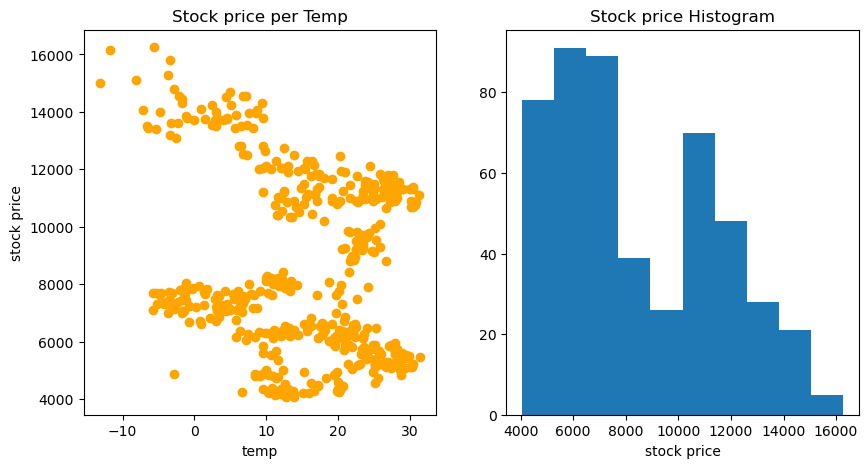

In [7]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Stock price per Temp")
ax1.set_xlabel("temp")
ax1.set_ylabel("stock price")
ax1.scatter(x=df['평균기온'], y=df['저가'], color='orange')

ax2.set_title("Stock price Histogram")
ax2.set_xlabel("stock price")
ax2.hist(df['저가'], bins=10)

plt.show()